# CRM Data Analyst Case - Part 2

### Description

The objective of the team is to build a predictive model that will produce the highest profit for the
next direct marketing campaign, scheduled for the next month. 
The new campaign, sixth, aims at
selling a new gadget to the Customer Database. 
To build the model, a pilot campaign involving **2240 customers** was carried out. 
The customers were selected at random and contacted by phone regarding the acquisition of the gadget. 
During the following months, customers who bought the offer were properly labeled. 
The total cost of the sample campaign was 6.720MU and the revenue generated by the customers who accepted the offer was 3.674MU. 
Globally the campaign had a profit of -3.046MU. 
The success rate of the campaign was 15%. 

The objective is of the team is to develop a model that predicts customer behavior and to apply it to the rest of the customer base.
Hopefully the model will allow the company to cherry pick the customers that are most likely to
purchase the offer while leaving out the non-respondents, making the next campaign highly
profitable. Moreover, other than maximizing the profit of the campaign, the CMO is interested in
understanding to study the characteristic features of those customers who are willing to buy the
gadget.

### Key Objectives are:

1. Explore the data – don’t just plot means and counts. Provide insights, define cause and
effect. Provide a better understanding of the characteristic features of respondents;
2. Propose and describe a customer segmentation based on customers behaviors;
3. Create a predictive model which allows the company to maximize the profit of the next
marketing campaign.
4. Whatever else you think is necessary.

### Deliverables:

1. Data Exploration;
2. Segmentation;
3. Classification Model;
4. Feature Importance.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

import dataframe_image as dfi # converting dataframe into Image

In [4]:
# Read Dataset
url = '/Users/sarjak/Desktop/CRM-Analysis-for-Marketing-data-main/marketing data/clean_marketing_data.csv'
df = pd.read_csv(url)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,8996,1957,PhD,Married,51381,2,1,2012-11-19,4,230,...,8,9,0,0,0,0,0,0,0,GER
1,1994,1983,Graduation,Married,51381,1,0,2013-11-15,11,5,...,2,7,0,0,0,0,0,0,0,US
2,3769,1972,PhD,Together,51381,1,0,2014-03-02,17,25,...,3,7,0,0,0,0,0,0,0,AUS
3,5255,1986,Graduation,Single,51381,1,0,2013-02-20,19,5,...,0,1,0,0,0,0,0,0,0,AUS
4,8268,1961,PhD,Married,51381,0,1,2013-07-11,23,352,...,7,6,0,0,0,0,0,0,0,CA


In [5]:
df_new = df.copy()
df_new.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Country'], axis=1, inplace=True)

In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education            2240 non-null   object
 1   Marital_Status       2240 non-null   object
 2   Income               2240 non-null   int64 
 3   Kidhome              2240 non-null   int64 
 4   Teenhome             2240 non-null   int64 
 5   Recency              2240 non-null   int64 
 6   MntWines             2240 non-null   int64 
 7   MntFruits            2240 non-null   int64 
 8   MntMeatProducts      2240 non-null   int64 
 9   MntFishProducts      2240 non-null   int64 
 10  MntSweetProducts     2240 non-null   int64 
 11  MntGoldProds         2240 non-null   int64 
 12  NumDealsPurchases    2240 non-null   int64 
 13  NumWebPurchases      2240 non-null   int64 
 14  NumCatalogPurchases  2240 non-null   int64 
 15  NumStorePurchases    2240 non-null   int64 
 16  NumWeb

In [7]:
education=pd.get_dummies(df_new['Education'],drop_first=True)
marital=pd.get_dummies(df_new['Marital_Status'],drop_first=True)

In [8]:
df_new

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
0,PhD,Married,51381,2,1,4,230,42,192,49,...,2,8,9,0,0,0,0,0,0,0
1,Graduation,Married,51381,1,0,11,5,5,6,0,...,0,2,7,0,0,0,0,0,0,0
2,PhD,Together,51381,1,0,17,25,1,13,0,...,0,3,7,0,0,0,0,0,0,0
3,Graduation,Single,51381,1,0,19,5,1,3,3,...,0,0,1,0,0,0,0,0,0,0
4,PhD,Married,51381,0,1,23,352,0,27,10,...,1,7,6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,PhD,Divorced,66476,0,1,99,372,18,126,47,...,2,11,4,0,0,0,0,0,0,0
2236,2n Cycle,Married,31056,1,0,99,5,10,13,3,...,0,3,8,0,0,0,0,0,0,0
2237,Graduation,Divorced,46310,1,0,99,185,2,88,15,...,1,5,8,0,0,0,0,0,0,0
2238,Graduation,Married,65819,0,0,99,267,38,701,149,...,4,10,3,0,0,0,0,0,0,0


In [9]:
new_data=pd.concat([df_new,education,marital],axis=1)

In [10]:
new_data.drop(['Education','Marital_Status'],axis=1,inplace=True)

In [11]:
# Split dataset into features and labels
features = new_data.drop('Response', axis =1)
labels = df.Response

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.40, random_state = 5)

In [12]:
print('Train_x:',X_train.shape)
print('Train_y:',y_train.shape)
print('Test_x:',X_test.shape)
print('Test_y:',y_test.shape)

Train_x: (1344, 32)
Train_y: (1344,)
Test_x: (896, 32)
Test_y: (896,)


In [13]:
## Standardizing the data
from sklearn.preprocessing import StandardScaler
obje_ss=StandardScaler()

x_train_ss=obje_ss.fit_transform(X_train)
x_test_ss=obje_ss.fit_transform(X_test)

## 1. Logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

model_le=LogisticRegression(random_state=42, max_iter=10000)
model_le.fit(X_train, y_train)

parameters = {'C':[0.8,0.9,1,1.1,1.2], 'penalty':['l1','l2'],  'solver':['liblinear','saga']}

model_le_grid = GridSearchCV(model_le, parameters, cv=10, verbose=1, n_jobs=-1).fit(X_train, y_train)
print(model_le_grid.best_params_)

print('Logistic Regression Train score:', model_le.score(X_train,y_train)*100)
print('Logistic Regression Cross validation score:', model_le_grid.best_score_*100)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'C': 1.1, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Train score: 87.42559523809523
Logistic Regression Cross validation score: 89.05527915975678


In [15]:
model_le=LogisticRegression(C=1.1, penalty='l1', solver='liblinear')
model_le.fit(X_train,y_train)
print('Logistic Regression Train score:', model_le.score(X_train,y_train)*100)

predictions = model_le.predict(X_test)
print("Accuracy:",metrics.accuracy_score(predictions, y_test)*100)

Logistic Regression Train score: 90.02976190476191
Accuracy: 87.72321428571429


## 2. Support vector machine

In [16]:
from sklearn import svm

model_svc=svm.SVC(random_state=42)
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.8,0.9,1,1.1,1.2],'degree':[3,4,5,6]}
model_svc_grid = GridSearchCV(model_svc, parameters,cv=10,verbose=1,n_jobs=-1).fit(x_train_ss,y_train)
print(model_svc_grid.best_params_)

print('Support Vecktor Classification Cross validation score:', model_svc_grid.best_score_*100)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
{'C': 0.8, 'degree': 3, 'kernel': 'linear'}
Support Vecktor Classification Cross validation score: 88.98231066887783


In [17]:
model_svc=svm.SVC(degree =3, C=0.8,kernel='linear')
model_svc.fit(x_train_ss,y_train)
print('Support Vecktor Classification Train score:', model_svc.score(x_train_ss,y_train)*100)

predictions = model_svc_grid.predict(x_test_ss)
print("Accuracy:",metrics.accuracy_score(predictions, y_test)*100)

Support Vecktor Classification Train score: 90.32738095238095
Accuracy: 86.49553571428571


## 3. XGBoost

In [19]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [20]:
from xgboost import XGBClassifier

model_xgb=XGBClassifier(n_jobs=-1,random_state=42,eval_metric='logloss')
parameters = {'n_estimators':[50,100,200],'max_depth':[3,4,5,6],'learning_rate':[0.1,0.01]}
model_xgb_grid = GridSearchCV(model_xgb, parameters,cv=10,verbose=1).fit(X_train,y_train)
print(model_xgb_grid.best_params_)

print('XGB Classifier Cros validation score:',model_xgb_grid.best_score_*100)


Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
XGB Classifier Cros validation score: 89.13377556661139


In [21]:
model_xgb=XGBClassifier(n_jobs=-1,random_state=42,n_estimators=50,max_depth=5,learning_rate=0.1,eval_metric='logloss')
model_xgb.fit(X_train,y_train)
print('XGB Classifier Classifier Train score:',model_xgb.score(X_train,y_train)*100)

predictions = model_xgb_grid.predict(X_test)
print("Accuracy:", metrics.accuracy_score(predictions, y_test)*100)

XGB Classifier Classifier Train score: 96.27976190476191
Accuracy: 87.16517857142857


## 4. Generating the Model - Random Forest Regressor using GridSearchCv


In [22]:
# Using Grid Search to find the best parameters
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto'],
    'max_depth' : [None,3,5,8],
    'criterion' :['gini'],
    'min_samples_split':[2,3,4]
}

# Training RF Models with K-Fold of 5 
rf_models = GridSearchCV(RandomForestClassifier(random_state = 5), 
                         param_grid=param_grid, cv=5, verbose=1)

rf_models.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=5),
             param_grid={'criterion': ['gini'], 'max_depth': [None, 3, 5, 8],
                         'max_features': ['auto'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [23]:
# Get the predictions
predictions = rf_models.predict(X_test)

# Print the Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(predictions, y_test))

Accuracy: 0.8616071428571429


## Feature Importance

Calculating top 15 features

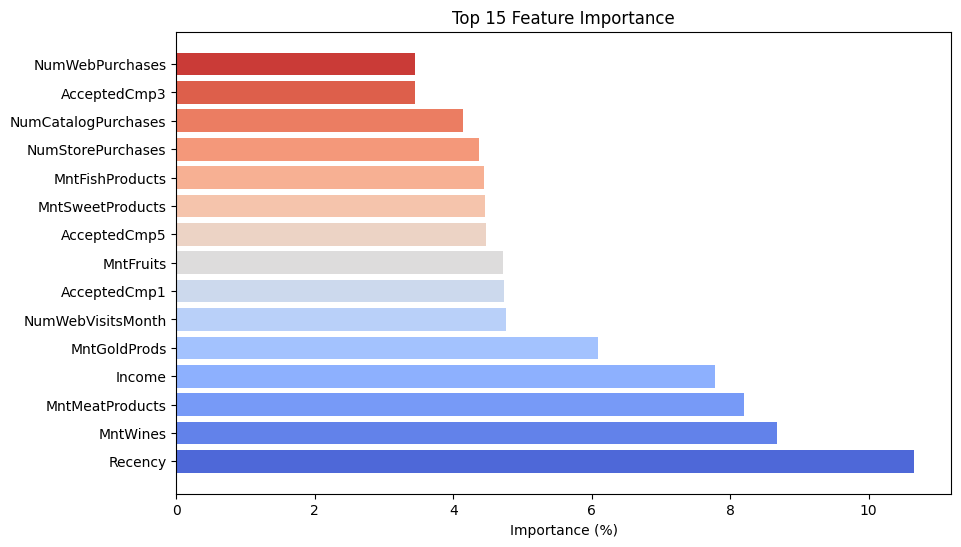

<Figure size 640x480 with 0 Axes>

In [34]:
# Print Feature Importance

import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.DataFrame(data={"features": X_test.columns, 
                            "importance": rf_models.best_estimator_.feature_importances_ * 100})

feature_importance = feature_importance.sort_values('importance', ascending=False).head(15)

colors = sns.color_palette("coolwarm", len(feature_importance))
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['features'], feature_importance['importance'], color=colors)
plt.xlabel('Importance (%)')
plt.title('Top 15 Feature Importance')
plt.show()


In [35]:
# Saving dataframe as an image
dfi.export(feature_importance, 'Images/Feature_Importance_IFood_CRM_Sarjak.png')


In [36]:
feat_values = feature_importance.features.values.tolist()
feat_values

['Recency',
 'MntWines',
 'MntMeatProducts',
 'Income',
 'MntGoldProds',
 'NumWebVisitsMonth',
 'AcceptedCmp1',
 'MntFruits',
 'AcceptedCmp5',
 'MntSweetProducts',
 'MntFishProducts',
 'NumStorePurchases',
 'NumCatalogPurchases',
 'AcceptedCmp3',
 'NumWebPurchases']

In [37]:
# Split dataset into features and labels
features_feat = new_data.loc[:, feat_values]
labels_feat = df.Response

# Split dataset into training set and test set
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(features_feat, labels_feat, test_size=0.40, random_state = 5)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

model_le=LogisticRegression(random_state=42, max_iter=10000)
model_le.fit(X_train_feat, y_train_feat)

parameters = {'C':[0.8,0.9,1,1.1,1.2], 'penalty':['l1','l2'],  'solver':['liblinear','saga']}

model_le_grid = GridSearchCV(model_le, parameters, cv=10, verbose=1, n_jobs=-1).fit(X_train_feat, y_train_feat)
print(model_le_grid.best_params_)

print('Logistic Regression Train score:', model_le.score(X_train_feat,y_train_feat)*100)
print('Logistic Regression Cross validation score:', model_le_grid.best_score_*100)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'C': 1.1, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Train score: 87.42559523809523
Logistic Regression Cross validation score: 88.38529574350471


In [39]:
model_le=LogisticRegression(C=1.1, penalty='l1', solver='liblinear')
model_le.fit(X_train_feat, y_train_feat)
print('Logistic Regression Train score:', model_le.score(X_train_feat,y_train_feat)*100)

predictions = model_le.predict(X_test_feat)
print("Accuracy:", metrics.accuracy_score(predictions, y_test_feat)*100)

Logistic Regression Train score: 88.98809523809523
Accuracy: 85.71428571428571
